In [14]:
!pip install tensorflow numpy pandas seaborn

In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Valores reais
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

# Valores previstos
y_pred = np.array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

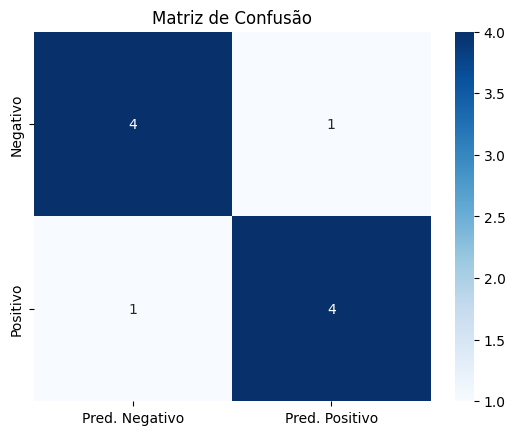

In [17]:
matriz = tf.math.confusion_matrix(y_true, y_pred)

df_matriz = pd.DataFrame(
    matriz.numpy(),
    index=["Negativo", "Positivo"],
    columns=["Pred. Negativo", "Pred. Positivo"]
)

sns.heatmap(df_matriz, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()

VN, FP, FN, VP = matriz.numpy().ravel()

In [18]:
sensibilidade = VP / (VP + FN)
print(f"Sensibilidade (Recall): {sensibilidade:.2f}")

Sensibilidade (Recall): 0.80


In [19]:
acuracia = (VP + VN) / (VP + VN + FP + FN)
print(f"Acurácia: {acuracia:.2f}")

Acurácia: 0.80


In [20]:
precisao = VP / (VP + FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

print(f"Precisão: {precisao:.2f}")
print(f"F-score: {f_score:.2f}")

Precisão: 0.80
F-score: 0.80


In [21]:
y_prob = np.array([0.9, 0.1, 0.8, 0.4, 0.2, 0.7, 0.3, 0.6, 0.85, 0.05])

In [22]:
# Ordenar thresholds
thresholds = np.sort(np.unique(y_prob))[::-1]

tpr_list = []
fpr_list = []

for t in thresholds:
    y_pred_threshold = (y_prob >= t).astype(int)

    matriz = tf.math.confusion_matrix(y_true, y_pred_threshold).numpy()
    VN, FP, FN, VP = matriz.ravel()

    tpr = VP / (VP + FN) if (VP + FN) != 0 else 0
    fpr = FP / (FP + VN) if (FP + VN) != 0 else 0

    tpr_list.append(tpr)
    fpr_list.append(fpr)

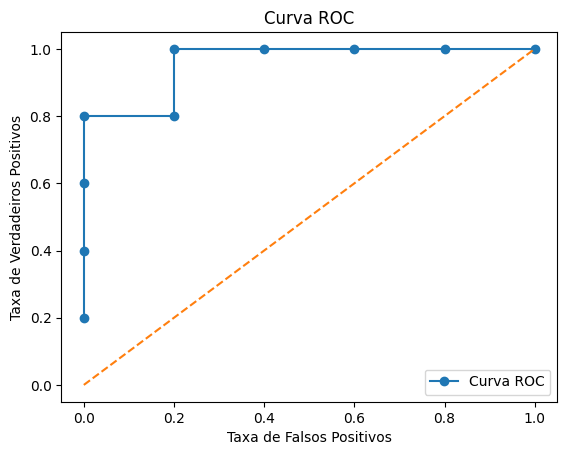

In [23]:
plt.figure()
plt.plot(fpr_list, tpr_list, marker='o', label='Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [24]:
auc = tf.keras.metrics.AUC()
auc.update_state(y_true, y_prob)

print(f"AUC: {auc.result().numpy():.2f}")

AUC: 0.96


In [26]:
## Conclusão

##Neste projeto foi gerada uma matriz de confusão utilizando TensorFlow.
##A partir dela, foram calculadas as métricas de sensibilidade, acurácia e F-score.
##Por fim, a Curva ROC foi construída para avaliar o desempenho do modelo de
##classificação de forma gráfica.